In [2]:
# Importando las librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Cargando el conjunto de datos

In [3]:
df = pd.read_excel('case_fit_regression_model.xlsx')

In [3]:
df.head()

,Viscosity,Temp,Stir,Time
0,2750.0,147.0,57.0,170.0
1,2900.0,164.0,49.0,130.0
2,2630.0,141.0,47.0,160.0
3,2800.0,164.0,74.0,135.0
4,3000.0,132.0,65.0,150.0


In [4]:
df.describe()

,Viscosity,Temp,Stir,Time
count,510.000000,510.000000,510.000000,510.000000
mean,1828.411765,113.029412,98.352941,131.058824
std,881.647326,45.945208,42.899659,41.797281
min,251.460000,35.640000,27.918000,58.806000
25%,1188.000000,78.000000,66.362000,96.840000
50%,1791.950000,105.831000,90.392000,127.260000
75%,2528.337500,144.637500,124.381500,162.346500
max,3915.770000,231.896000,216.342000,240.380000


Text(0.5, 0, 'Temperature')

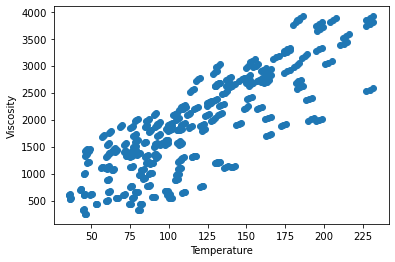

In [5]:
fig, ax = plt.subplots()
ax.scatter(df.Temp, df.Viscosity)
ax.set_ylabel("Viscosity")
ax.set_xlabel("Temperature")

Text(0.5, 0, 'Stir')

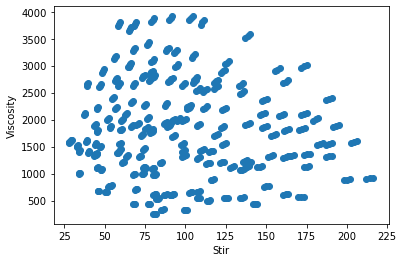

In [7]:
fig, ax = plt.subplots()
ax.scatter(df.Stir, df.Viscosity)
ax.set_ylabel("Viscosity")
ax.set_xlabel("Stir")

Text(0.5, 0, 'Time')

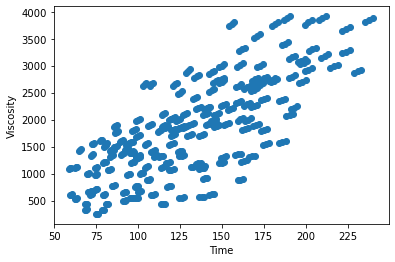

In [8]:
fig, ax = plt.subplots()
ax.scatter(df.Time, df.Viscosity)
ax.set_ylabel("Viscosity")
ax.set_xlabel("Time")

### Estudiar la correlacion Pearson product-moment

In [9]:
cm = np.corrcoef(df[["Viscosity", "Temp", "Stir", "Time"]])

In [10]:
print(cm)

[[1.         0.99984829 0.99999673 ... 0.99406649 0.9833794  0.9883468 ]
 [0.99984829 1.         0.99985408 ... 0.99359419 0.9816229  0.98751894]
 [0.99999673 0.99985408 1.         ... 0.99378526 0.98293671 0.9879549 ]
 ...
 [0.99406649 0.99359419 0.99378526 ... 1.         0.9960095  0.99897579]
 [0.9833794  0.9816229  0.98293671 ... 0.9960095  1.         0.99852181]
 [0.9883468  0.98751894 0.9879549  ... 0.99897579 0.99852181 1.        ]]


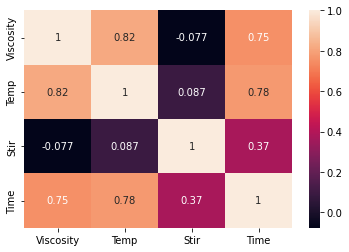

In [11]:
# Plot the heatmap
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [4]:
X0 = df[["Temp", "Stir", "Time"]]
print(X0)

        Temp    Stir     Time
0    147.000  57.000  170.000
1    164.000  49.000  130.000
2    141.000  47.000  160.000
3    164.000  74.000  135.000
4    132.000  65.000  150.000
..       ...     ...      ...
505   35.640  90.882   59.400
506   59.994  74.250   58.806
507   36.234  81.972   62.370
508   45.738  80.190   74.844
509   44.550  84.942   68.310

[510 rows x 3 columns]


In [6]:
y = df.Viscosity

X es el conjunto de datos de entrada, "y" son los datos de salida

## Estandarizado de datos

In [5]:
# Standarize features (mean = 0, variance = 1)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X0)

In [15]:
print(X)

[[ 0.74009768 -0.96489213  0.93258244]
 [ 1.11046691 -1.15155689 -0.02535723]
 [ 0.60937913 -1.19822308  0.69309752]
 ...
 [-1.67309749 -0.38221807 -1.64499371]
 [-1.46603931 -0.42379764 -1.34626023]
 [-1.49192158 -0.31291877 -1.50273967]]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Funcion de validacion cruzada

La funcion de validacion cruzada se utiliza para prevenir el overfitting.
El conjunto de entrenamiento se divide en k subconjuntos mas pequeños. En cada ciclo se guarda un subconjunto para el testing y los demas se usan para el training.

In [8]:
from sklearn.model_selection import cross_val_score

# Define a function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print("CV Mean: ", np.mean(scores))
    print("STD: ", np.std(scores))
    print("\n")

In [18]:
from sklearn.linear_model import LinearRegression
# Train the OLS model
lr= LinearRegression()

In [19]:
lr_fit = lr.fit(X_train, y_train)

In [20]:
y_pred = lr.predict(X_test)

In [21]:
lr.score(X_test, y_test)

0.8230765712189341

Score obtiene el R^2 del conjunto de datos

In [22]:
lr_scores = get_cv_scores(lr)

CV Mean:  0.745248452572658
STD:  0.026538568703022736




In [24]:
print("Train Score: ", lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))

Train Score:  0.755014658138448
Test Score:  0.8230765712189341


Si el R^2 del conjunto de testing es mas alto que el del conjunto de entrenamiento significa que no hay sobreajuste

In [25]:
lr.intercept_

1823.5924333981623

In [26]:
for coef, col in enumerate(X0.columns):
    print(f'{col}:{lr.coef_[coef]}')

Temp:366.9318351202476
Stir:-279.5966054423423
Time:488.3031177665122


Estos ultimos datos representan los pesos en la funcion de los minimos cuadrados lineales con multiples datos

# Ridge Model

In [12]:
from sklearn.linear_model import Ridge

In [13]:
# Training Ridge model
ridge = Ridge().fit(X_train, y_train)

In [14]:
# Cross validate the model
get_cv_scores(ridge)
print('Train Score: ', ridge.score(X_train, y_train))
print('Test Score: ', ridge.score(X_test, y_test))

CV Mean:  0.745297937750709
STD:  0.026700074631851298


Train Score:  0.7550088846741698
Test Score:  0.8231645885808091


### Buscar el hyperparametro optimo a

In [15]:
from sklearn.model_selection import GridSearchCV
# Find optimal alpha with grid search
alpha = np.logspace(-6, 6, 13)
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Best Score:  0.7452979377507091
Best Params:  {'alpha': 1.0}


### Ejecutar la regresion con el valor alpha optimo

In [32]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
get_cv_scores(ridge)
print('Train Score: ', ridge.score(X_train, y_train))
print('Test Score: ', ridge.score(X_test, y_test))

CV Mean:  0.745297937750709
STD:  0.026700074631851298


Train Score:  0.7550088846741698
Test Score:  0.8231645885808091


In [33]:
ridge.intercept_

1823.4835292362886

In [34]:
for coef, col in enumerate(X0.columns):
    print(f'{col}:{ridge.coef_[coef]}')

Temp:367.93437368931427
Stir:-277.75491514644824
Time:485.33610125842574


#### La funcion RidgeCV() implementa la regresion ridge con validacion cruzada y la busqueda en grid de alpha

In [35]:
from sklearn import linear_model
ridge2 = linear_model.RidgeCV(alphas=np.logspace(-4, 4, 9))
ridge2 = ridge2.fit(X_train, y_train)
ridge2.alpha_

1.0

In [36]:
ridge2

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]))

In [37]:
print('Train Score: ', ridge2.score(X_train, y_train))
print('Test Score: ', ridge2.score(X_test, y_test))

Train Score:  0.7550088846741705
Test Score:  0.8231645885807995


# Lasso regression

Lasso es un modelo de penalizacion que introduce terminos para reducir la complejidad del modelo

Lasso entrena modelos lineales con regularizacion L1

In [41]:
from sklearn.linear_model import Lasso
# Train the model
lasso = Lasso().fit(X_train, y_train)

# Get cross validate scores
get_cv_scores(lasso)
print('Train Score: ', lasso.score(X_train, y_train))
print('Test Score: ', lasso.score(X_test, y_test))

CV Mean:  0.7452514109378442
STD:  0.02662362132275073


Train Score:  0.7550094037403817
Test Score:  0.8231436214100528


In [42]:
alpha = np.logspace(-4, 4, 9)
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score:  0.7452514109378442
Best Params:  {'alpha': 1.0}


In [43]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
get_cv_scores(lasso)
print('Train Score: ', lasso.score(X_train, y_train))
print('Test Score: ', lasso.score(X_test, y_test))

CV Mean:  0.7452514109378442
STD:  0.02662362132275073


Train Score:  0.7550094037403817
Test Score:  0.8231436214100528


#### LassoCV() implementa validacion cruzada, busqueda en el grid y el modelo lasso en un solo paso

In [46]:
lasso2 = linear_model.LassoCV(alphas=np.logspace(-4,4,9))
lasso2 = lasso2.fit(X_train, y_train)
lasso2.alpha_

0.1

In [48]:
print('Train Score: ', lasso2.score(X_train, y_train))
print('Test Score: ', lasso2.score(X_test, y_test))

Train Score:  0.7550146050499655
Test Score:  0.823083930864819


In [49]:
lasso.intercept_

1823.488821403259

In [50]:
for coef, col in enumerate(X0.columns):
    print(f'{col}:{lasso.coef_[coef]}')

Temp:367.42602098792514
Stir:-277.6872234131124
Time:485.9864994910504


In [52]:
names = X0.columns

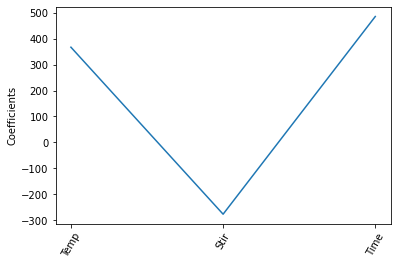

In [53]:
_ = plt.plot(range(len(names)), lasso.coef_)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel("Coefficients")
plt.show()

# Elastic-net regression

In [9]:
from sklearn.linear_model import ElasticNet
# Train Elastic-Net model with default alpha = 1 and l1_ratio = 0.5
elastic_net = ElasticNet().fit(X_train, y_train)

In [10]:
# Get cross validate scores
get_cv_scores(elastic_net)

CV Mean:  0.6835083580422305
STD:  0.03264751459452257




#### Grid search

In [16]:
# Encontrar los hyperparametros optimos
alpha = np.logspace(-4, 4, 9)
l1_ratio = np.linspace(0,1.0,11)
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best Score:  0.745339973105575
Best Params:  {'alpha': 0.01, 'l1_ratio': 0.0}


C:\Users\xmen9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.443e+07, tolerance: 2.741e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [19]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0, max_iter=10000000).fit(X_train, y_train)
get_cv_scores(elastic_net)
print('Train Score: ', elastic_net.score(X_train, y_train))
print('Test Score: ', elastic_net.score(X_test, y_test))

C:\Users\xmen9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+07, tolerance: 2.200e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


CV Mean:  0.7453399731055713
STD:  0.0270179806361164


Train Score:  0.7549341034328538
Test Score:  0.8233274037418536


In [20]:
elastic_net.intercept_

1823.1847414455642

In [21]:
elastic_net.coef_

array([ 370.44719984, -272.74901559,  477.37824125])

In [23]:
for coef, col in enumerate(X0.columns):
    print(f'{col}:{elastic_net.coef_[coef]}')

Temp:370.4471998427463
Stir:-272.7490155945542
Time:477.3782412474974


In [24]:
lists = {'Model':['OLS', 'Ridge', 'Lasso', 'Elastic-Net'],
        'CV Mean':[0.74, 0.74, 0.74, 0.75],
        'CV STD':[0.07, 0.07, 0.07, 0.03],
        'Train Score':[0.78,0.78,0.78,0.75],
        'Test Score':[0.77,0.77,0.77,0.82]}
model_comparison = pd.DataFrame(lists)
print(model_comparison)

         Model  CV Mean  CV STD  Train Score  Test Score
0          OLS     0.74    0.07         0.78        0.77
1        Ridge     0.74    0.07         0.78        0.77
2        Lasso     0.74    0.07         0.78        0.77
3  Elastic-Net     0.75    0.03         0.75        0.82


In [25]:
# Linear model intercepts and coefficients
lists = {'Model':['OLS', 'Ridge', 'Lasso', 'Elastic-Net'],
        'a0':[1860,1860,1860,1823],
        'a1':[371,375,371,370],
        'a2':[-301,-295,-301,-273],
        'a3':[493,484,493,477]}
model_comparison = pd.DataFrame(lists)
print(model_comparison)

         Model    a0   a1   a2   a3
0          OLS  1860  371 -301  493
1        Ridge  1860  375 -295  484
2        Lasso  1860  371 -301  493
3  Elastic-Net  1823  370 -273  477
